## Web Scrapping Plus EDA of:
## "list of most popular website" from Wikipedia.

### Questions to answer:
- Number of top websites in each country.
- Number of top website by categories.
- Number of top website by subcategories.
- list of five top website.
- list of last five website in the ranking of top website.

In [1]:
# import necessary libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
# Request for the HTML response using the URL

wikipedia_url = "https://en.wikipedia.org/wiki/List_of_most_visited_websites"
response = requests.get(wikipedia_url)
print(response.status_code)


200


In [3]:
# parse data from the html into a beautifulsoup object

soup = BeautifulSoup(response.text, "html.parser")
website_table = soup.find("table", {"class":"wikitable"})

In [4]:
# puting the table into a dataframe

popular_website_df = pd.read_html(str(website_table))
df = pd.DataFrame(popular_website_df[0])
df.head()

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Principal country/territory
0,Google Search,google.com,1 (),Computers Electronics and Technology > Search ...,United States
1,YouTube,youtube.com,2 (),Arts & Entertainment > TV Movies and Streaming,United States
2,Facebook,facebook.com,3 (),Computers Electronics and Technology > Social ...,United States
3,Twitter,twitter.com,4 (),Computers Electronics and Technology > Social ...,United States
4,Instagram,instagram.com,5 (),Computers Electronics and Technology > Social ...,United States


## Cleaning the dataframe

In [5]:
# renaming the column for easy access

df = df.rename(columns = {'Similarweb top 50websites ranking(As of April 1, 2022[1]': "SimilarWeb Ranking", "Principal country/territory":"Country"})

df.head()

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Country
0,Google Search,google.com,1 (),Computers Electronics and Technology > Search ...,United States
1,YouTube,youtube.com,2 (),Arts & Entertainment > TV Movies and Streaming,United States
2,Facebook,facebook.com,3 (),Computers Electronics and Technology > Social ...,United States
3,Twitter,twitter.com,4 (),Computers Electronics and Technology > Social ...,United States
4,Instagram,instagram.com,5 (),Computers Electronics and Technology > Social ...,United States


In [6]:
# splitting the category column

df[['Category', 'SubCategory']] = df['Category'].str.split(" > ", expand = True)
df.head()

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Country,SubCategory
0,Google Search,google.com,1 (),Computers Electronics and Technology,United States,Search Engines
1,YouTube,youtube.com,2 (),Arts & Entertainment,United States,TV Movies and Streaming
2,Facebook,facebook.com,3 (),Computers Electronics and Technology,United States,Social Networks and Online Communities
3,Twitter,twitter.com,4 (),Computers Electronics and Technology,United States,Social Networks and Online Communities
4,Instagram,instagram.com,5 (),Computers Electronics and Technology,United States,Social Networks and Online Communities


In [7]:
df.columns


Index(['Site', 'Domain Name',
       'Similarweb top 50websites ranking(As of April 1, 2022[1]', 'Category',
       'Country', 'SubCategory'],
      dtype='object')

In [8]:
df[["SmilarWeb Rank", "nonsense_to_remove"]] = df.iloc[:,2].str.split(" ", expand = True)
df.head()

,Site,Domain Name,"Similarweb top 50websites ranking(As of April 1, 2022[1]",Category,Country,SubCategory,SmilarWeb Rank,nonsense_to_remove
0,Google Search,google.com,1 (),Computers Electronics and Technology,United States,Search Engines,1,()
1,YouTube,youtube.com,2 (),Arts & Entertainment,United States,TV Movies and Streaming,2,()
2,Facebook,facebook.com,3 (),Computers Electronics and Technology,United States,Social Networks and Online Communities,3,()
3,Twitter,twitter.com,4 (),Computers Electronics and Technology,United States,Social Networks and Online Communities,4,()
4,Instagram,instagram.com,5 (),Computers Electronics and Technology,United States,Social Networks and Online Communities,5,()


In [9]:
df.columns

Index(['Site', 'Domain Name',
       'Similarweb top 50websites ranking(As of April 1, 2022[1]', 'Category',
       'Country', 'SubCategory', 'SmilarWeb Rank', 'nonsense_to_remove'],
      dtype='object')

In [10]:
# selection and regrouping of columns

df = df[['Site', 'Domain Name', 'Category', 'SubCategory', 'Country', 'SmilarWeb Rank']]
df.head()

,Site,Domain Name,Category,SubCategory,Country,SmilarWeb Rank
0,Google Search,google.com,Computers Electronics and Technology,Search Engines,United States,1
1,YouTube,youtube.com,Arts & Entertainment,TV Movies and Streaming,United States,2
2,Facebook,facebook.com,Computers Electronics and Technology,Social Networks and Online Communities,United States,3
3,Twitter,twitter.com,Computers Electronics and Technology,Social Networks and Online Communities,United States,4
4,Instagram,instagram.com,Computers Electronics and Technology,Social Networks and Online Communities,United States,5


## Top Ranked Countries

In [11]:
# top countries with highest number of high ranked website is The United State, followed by Rusia

df["Country"].value_counts()

United States     30
Russia             6
China              4
Japan              2
South Korea        2
Brazil             2
Czech Republic     2
Cyprus             1
Canada             1
Name: Country, dtype: int64

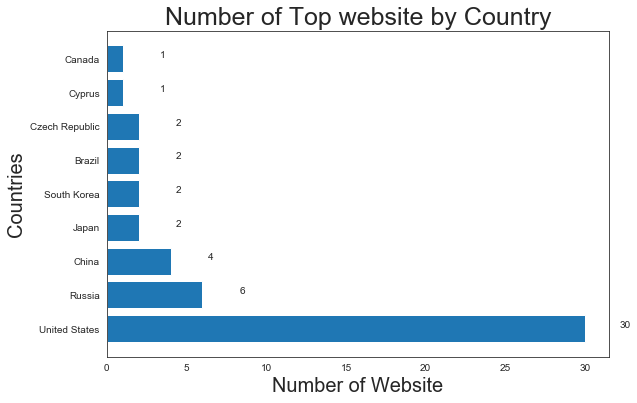

In [12]:

# creating the plot
figure, axis = plt.subplots(figsize = (9,6))

top_country = df["Country"].value_counts()

plot = axis.barh(top_country.index, top_country)
plt.title('Number of Top website by Country', size=25)
plt.xlabel('Number of Website', size = 20)
plt.ylabel('Countries', size = 20)

for rectangle in plot:
    width = rectangle.get_width()
    axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha = 'center', va ='bottom')

plt.savefig('topcountry.png', bbox_inches='tight')
plt.show();

## Top Ranked Categories

In [13]:
# number of top websites by per category

df["Category"].value_counts()

Computers Electronics and Technology    26
News and Media                           8
Arts & Entertainment                     4
Adult                                    4
Science and Education                    2
E commerce and Shopping                  2
Games                                    2
Adult content                            1
Reference Materials                      1
Name: Category, dtype: int64

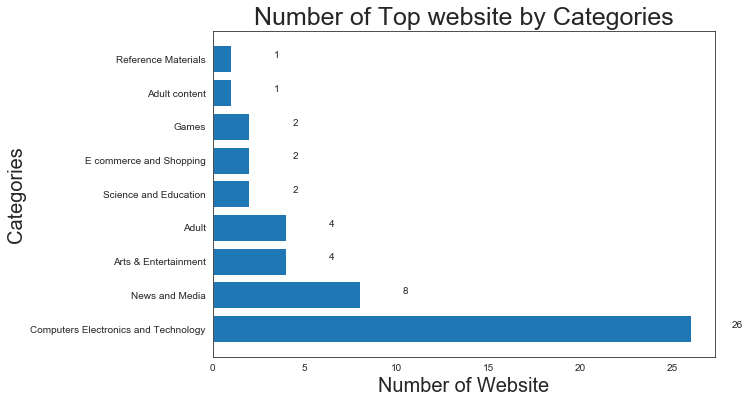

In [14]:
# creating the plot

top_category = df["Category"].value_counts()


figure, axis = plt.subplots(figsize = (9,6))

plot = axis.barh(top_category.index, top_category)
plt.title('Number of Top website by Categories', size=25)
plt.xlabel('Number of Website', size = 20)
plt.ylabel('Categories', size = 20)

for rectangle in plot:
    width = rectangle.get_width()
    axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha = 'center', va ='bottom')

plt.savefig('topcategories.png', bbox_inches='tight')
plt.show();

## Top Ranked Sub-Categories

In [15]:
# subcategories with mmost rank

df["SubCategory"].value_counts()

Social Networks and Online Communities        11
Search Engines                                 6
Programming and Developer Software             3
Other Computers Electronics and Technology     2
Marketplace                                    2
Weather                                        2
TV Movies and Streaming                        2
Email                                          2
Video Games Consoles and Accessories           2
Other Arts and Entertainment                   1
Consumer Electronics                           1
Telecommunications                             1
Dictionaries and Encyclopedias                 1
Animation and Comics                           1
Name: SubCategory, dtype: int64

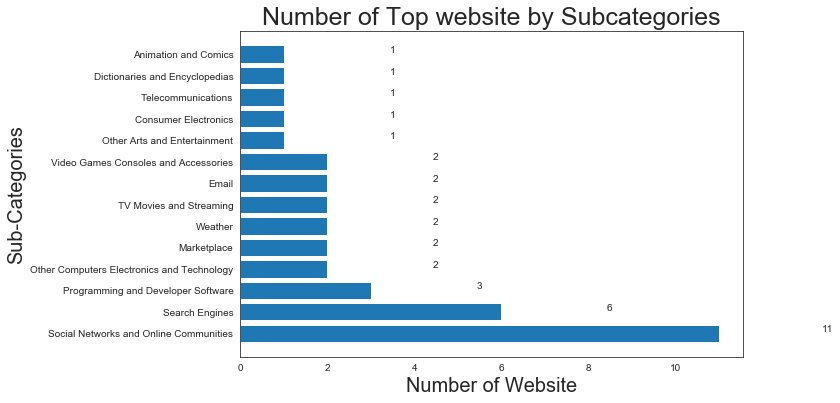

In [16]:

# creating the plot
figure, axis = plt.subplots(figsize = (9,6))

top_subcategories = df["SubCategory"].value_counts()

plot = axis.barh(top_subcategories.index, top_subcategories)
plt.title('Number of Top website by Subcategories', size=25)
plt.xlabel('Number of Website', size = 20)
plt.ylabel('Sub-Categories', size = 20)

for rectangle in plot:
    width = rectangle.get_width()
    axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha = 'center', va ='bottom')

plt.savefig('topsubcategories.png', bbox_inches='tight')
plt.show();

## First 5 Top-Ranked websites

In [17]:
top_sites = df.head(5)
top_sites[['Site','Domain Name', "SmilarWeb Rank" ]]

,Site,Domain Name,SmilarWeb Rank
0,Google Search,google.com,1
1,YouTube,youtube.com,2
2,Facebook,facebook.com,3
3,Twitter,twitter.com,4
4,Instagram,instagram.com,5


## Least 5 Top Ranked Website

In [18]:
top_sites = df.tail(5)
top_sites[['Site','Domain Name', "SmilarWeb Rank" ]].sort_values(by = 'SmilarWeb Rank', ascending = False)

,Site,Domain Name,SmilarWeb Rank
49,OK.ru,ok.ru,50
48,Weather,weather.com,49
47,RealSRV,realsrv.com,48
46,Telegram,t.me,47
45,Fandom,fandom.com,46


### By: Ayobami Samuel Obitade
#### Stay Blessed!